In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("sentiment_analysis.csv")

In [3]:
df.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram


In [4]:
#eda

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           499 non-null    int64 
 1   Month          499 non-null    int64 
 2   Day            499 non-null    int64 
 3   Time of Tweet  499 non-null    object
 4   text           499 non-null    object
 5   sentiment      499 non-null    object
 6   Platform       499 non-null    object
dtypes: int64(3), object(4)
memory usage: 27.4+ KB


In [6]:
df.shape

(499, 7)

In [7]:
df.isnull().sum()

Year             0
Month            0
Day              0
Time of Tweet    0
text             0
sentiment        0
Platform         0
dtype: int64

In [8]:
df.describe().T.style.background_gradient(axis=1)

,count,mean,std,min,25%,50%,75%,max
Year,499.000000,2020.394790,2.830991,2010.000000,2019.000000,2021.000000,2023.000000,2023.000000
Month,499.000000,6.084168,3.652711,1.000000,2.000000,6.000000,9.000000,12.000000
Day,499.000000,15.693387,8.804673,1.000000,8.000000,15.000000,22.000000,31.000000


In [9]:
df_columns=df.columns
for col in df.columns:
    print(col)

Year
Month
Day
Time of Tweet
text
sentiment
Platform


In [10]:
df1= df.loc[:,("text", "sentiment")]

In [11]:
df1.head()

,text,sentiment
0,What a great day!!! Looks like dream.,positive
1,"I feel sorry, I miss you here in the sea beach",positive
2,Don't angry me,negative
3,We attend in the class just for listening teac...,negative
4,"Those who want to go, let them go",negative


### Visualization

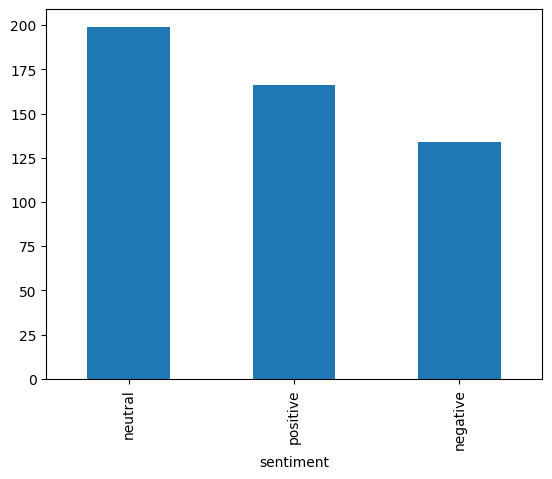

In [12]:
df.sentiment.value_counts().plot(kind='bar')
plt.show()

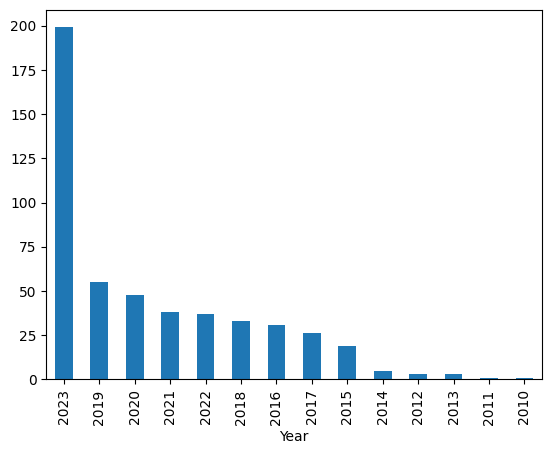

In [13]:
df.Year.value_counts().plot(kind='bar')
plt.show()

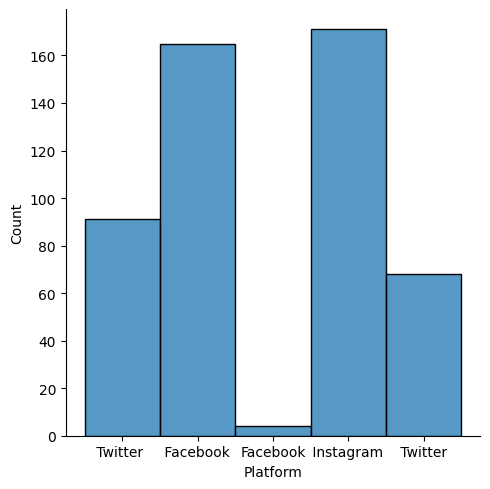

In [14]:
sns.displot(df.Platform ,fill=True)

Text(0, 0.5, 'platform')

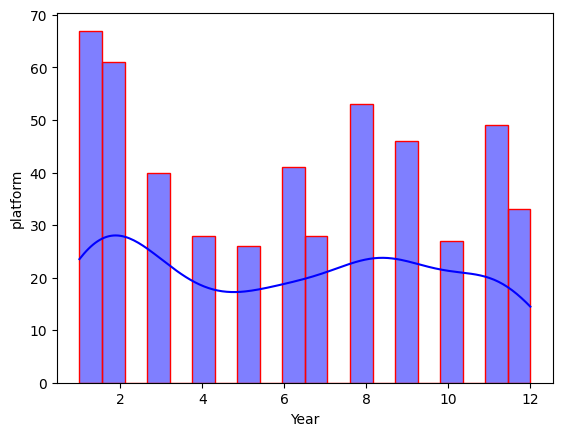

In [15]:
sns.histplot(df['Month'],bins=20,color='Blue',edgecolor='Red',kde=True)
plt.xlabel("Year")
plt.ylabel("platform")

<Axes: xlabel='Year', ylabel='Platform'>

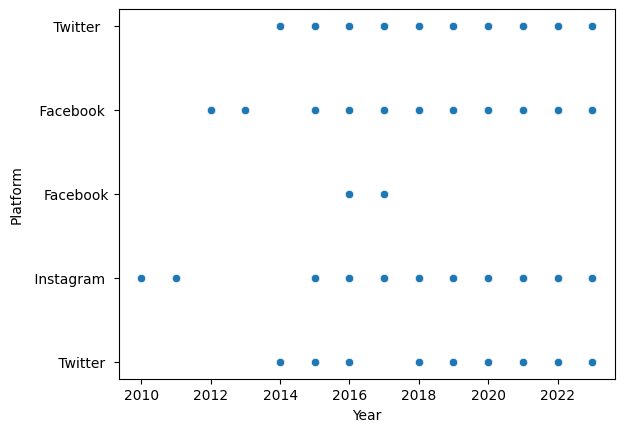

In [16]:
sns.scatterplot(data = df , x ='Year' , y ='Platform')

In [17]:
df_columns=df.columns
for col in df.columns:
    print(col)


Year
Month
Day
Time of Tweet
text
sentiment
Platform


In [18]:
df["sentiment"].value_counts()
df["sentiment"]=df["sentiment"].replace({"positive":1,"neutral":0, "negative":2})

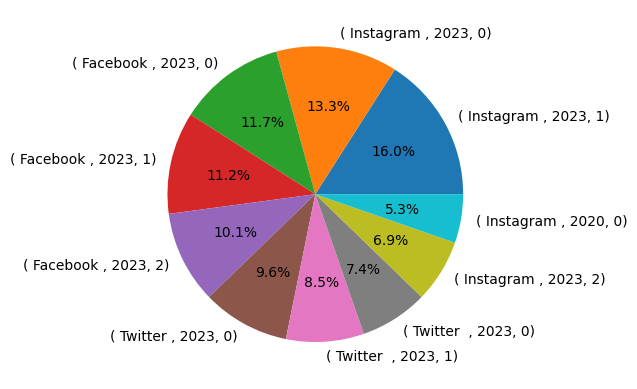

In [19]:
df.groupby(['Platform','Year']).sentiment.value_counts().sort_values(ascending = False).head(10).plot(kind = 'pie',autopct = '%1.1f%%',ylabel='')
plt.show()

## Preparing

### Remove punctuation

In [20]:
import string

In [21]:
punc = string.punctuation

def remove_punctuation(text):
    lst = []
    text = text.lower()
    for word in text:
        if word not in punc:
            lst.append(word)

    x = lst[:]
    lst.clear()
    return "".join(x)


df["text"] = df["text"].apply(remove_punctuation)

df.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,what a great day looks like dream,1,Twitter
1,2018,8,18,noon,i feel sorry i miss you here in the sea beach,1,Facebook
2,2017,8,18,night,dont angry me,2,Facebook
3,2022,6,8,morning,we attend in the class just for listening teac...,2,Facebook
4,2022,6,8,noon,those who want to go let them go,2,Instagram


### Removing stop words

In [22]:
from nltk.corpus import stopwords

In [23]:
#extra
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [24]:
stop = stopwords.words("english")

def remove_stopwords(text):
    lst = []

    for word in text.split():
        if word not in stop:
            lst.append(word)

    x = lst[:
           ]
    lst.clear()
    return " ".join(x)


df["text"] = df["text"].apply(remove_stopwords)

In [25]:
df.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,great day looks like dream,1,Twitter
1,2018,8,18,noon,feel sorry miss sea beach,1,Facebook
2,2017,8,18,night,dont angry,2,Facebook
3,2022,6,8,morning,attend class listening teachers reading slide ...,2,Facebook
4,2022,6,8,noon,want go let go,2,Instagram


### Stemmering the data

In [26]:
#extra
!pip install nltk
nltk.download('punkt')


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\91876\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [27]:
from nltk.stem import PorterStemmer
import nltk
ps = PorterStemmer()

def stemming(text):
    words = nltk.word_tokenize(text)
    stemmed_words = [ps.stem(word) for word in words]
    return " ".join(stemmed_words)

df["text"]=df["text"].apply(stemming)

In [28]:
df.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,great day look like dream,1,Twitter
1,2018,8,18,noon,feel sorri miss sea beach,1,Facebook
2,2017,8,18,night,dont angri,2,Facebook
3,2022,6,8,morning,attend class listen teacher read slide nonsenc,2,Facebook
4,2022,6,8,noon,want go let go,2,Instagram


### Lemmatizing the data

In [29]:
from nltk.stem import WordNetLemmatizer

In [30]:
nltk.download("wordnet")

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [31]:
lemmatizer = WordNetLemmatizer()

def lemmatizing(text):
    words = nltk.word_tokenize(text)
    lemma_words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(lemma_words)

df["text"]=df["text"].apply(lemmatizing)

In [32]:
df["text"]

0                           great day look like dream
1                           feel sorri miss sea beach
2                                          dont angri
3      attend class listen teacher read slide nonsenc
4                                      want go let go
                            ...                      
494            accord quarter famili six live poverti
495                          plan spend money go well
496                   upload bamboozl pictur facebook
497             congratul guy finish month earli booo
498                        actual wish back taho miss
Name: text, Length: 499, dtype: object

In [33]:
df.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,great day look like dream,1,Twitter
1,2018,8,18,noon,feel sorri miss sea beach,1,Facebook
2,2017,8,18,night,dont angri,2,Facebook
3,2022,6,8,morning,attend class listen teacher read slide nonsenc,2,Facebook
4,2022,6,8,noon,want go let go,2,Instagram


## Splitting the data

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.svm import SVC

In [35]:
X = df['text']
Y = df['sentiment']

In [36]:
X_train , X_test ,y_train , y_test = train_test_split(X , Y , train_size = 0.8 , random_state = 0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(399,)
(100,)
(399,)
(100,)


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
vc = TfidfVectorizer()
X_train = vc.fit_transform(X_train)
X_test = vc.transform(X_test)

## Using SVC model 

In [39]:
model = SVC()
model.fit(X_train, y_train)

# Make predictions
y_pred_cls = model.predict(X_test)

accuracy_cls = accuracy_score(y_test, y_pred_cls)

f1_cls = f1_score(y_test, y_pred_cls, average='weighted')


In [40]:
y_pred_cls

array([0, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1, 0, 2, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 2, 1, 0, 0, 2, 2, 1, 0, 1, 0, 0, 0,
       1, 1, 2, 2, 1, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [41]:
def val_to_category(val):
    category_map = {
       0:'neutral',
        1:'positive',
        2:'negative'
     }
    return category_map.get(val,-1)

In [42]:
def make_predictions(text):
    text = stemming(text)
    text = lemmatizing(text)
    text = vc.transform([text])
    val = model.predict(text)
    val = val_to_category(int(val[0]))
    print("sentiment is : ",val)

#### Making prediction

In [56]:
make_predictions('I feel sorry, I miss you here in the sea beach')

sentiment is :  positive


#### Score

In [44]:
f1_cls

0.5878914695683791

In [45]:
accuracy_cls

0.6

## Using Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
clf=RandomForestClassifier(n_estimators=100, criterion='gini')

In [48]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [49]:
clf.predict(X_test)

array([0, 2, 1, 0, 0, 2, 0, 2, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 2, 1, 0, 1, 0, 0, 0,
       1, 1, 2, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 2,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [50]:
def val_to_category(val):
    category_map = {
       0:'neutral',
        1:'positive',
        2:'negative'
     }
    return category_map.get(val,-1)

In [51]:
def make_predictions3(text):
    text = stemming(text)
    text = lemmatizing(text)
    text = vc.transform([text])
    val = clf.predict(text)
    val = val_to_category(int(val[0]))
    print("sentiment is : ",val)

#### Making prediction

In [52]:
make_predictions3('I feel sorry, I miss you here in the sea beach')

sentiment is :  positive


#### Score

In [53]:
score3=clf.score(X_test,y_test)

In [54]:
score3

0.65

In [55]:
!jupyter nbconvert --to python sent4byja.ipynb

[NbConvertApp] Converting notebook sent4byja.ipynb to python
[NbConvertApp] Writing 5362 bytes to sent4byja.py
